### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [162]:
data = pd.read_csv('data/coupons.csv')

In [163]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

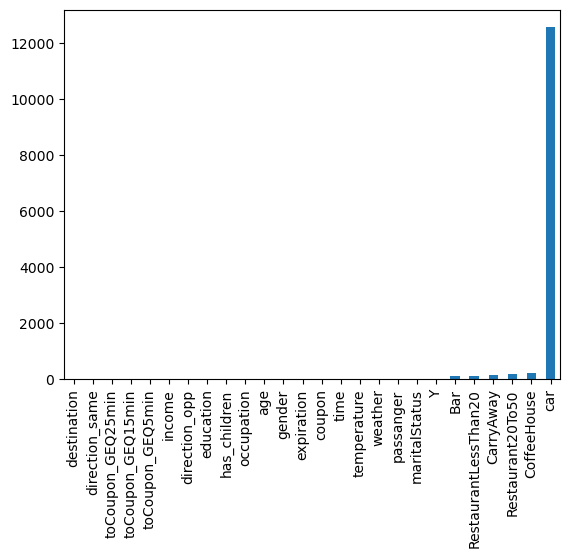

In [166]:
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.savefig('results/missing_plot.png')
plt.show()

In [167]:
data.loc[data['car'].notnull()]['car']

1237                      Scooter and motorcycle
1238                      Scooter and motorcycle
1239                      Scooter and motorcycle
1240                      Scooter and motorcycle
1241                      Scooter and motorcycle
                          ...                   
8293    Car that is too old to install Onstar :D
8294    Car that is too old to install Onstar :D
8295    Car that is too old to install Onstar :D
8296    Car that is too old to install Onstar :D
8297    Car that is too old to install Onstar :D
Name: car, Length: 108, dtype: object

In [168]:
data['Bar']

0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: Bar, Length: 12684, dtype: object

In [169]:
data['RestaurantLessThan20']

0        4~8
1        4~8
2        4~8
3        4~8
4        4~8
        ... 
12679    4~8
12680    4~8
12681    4~8
12682    4~8
12683    4~8
Name: RestaurantLessThan20, Length: 12684, dtype: object

In [170]:
len(data.loc[data['RestaurantLessThan20'].isnull()])

130

In [171]:
data['CarryAway']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12679    1~3
12680    1~3
12681    1~3
12682    1~3
12683    1~3
Name: CarryAway, Length: 12684, dtype: object

In [172]:
data['CoffeeHouse']

0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: CoffeeHouse, Length: 12684, dtype: object

In [173]:
data['Restaurant20To50']

0        1~3
1        1~3
2        1~3
3        1~3
4        1~3
        ... 
12679    1~3
12680    1~3
12681    1~3
12682    1~3
12683    1~3
Name: Restaurant20To50, Length: 12684, dtype: object

In [174]:
data.loc[data['CoffeeHouse'].notnull()]['CoffeeHouse']

0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: CoffeeHouse, Length: 12467, dtype: object

3. Decide what to do about your missing data -- drop, replace, other...

In [176]:
df = data
df['Bar'] = df['Bar'].fillna('never')
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna('4~8')
df['Restaurant20To50'] = df['Restaurant20To50'].fillna('1~3')
df['CoffeeHouse'] = df['CoffeeHouse'].fillna('never')

4. What proportion of the total observations chose to accept the coupon?



In [178]:
len(df.loc[df['Y'] == 1]) / len(df)

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='count', ylabel='coupon'>

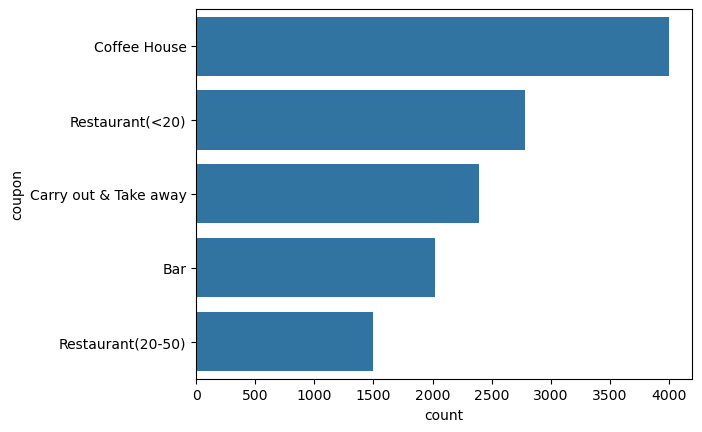

In [180]:
sns.barplot(y=df.coupon.value_counts().index, x=df.coupon.value_counts())

6. Use a histogram to visualize the temperature column.

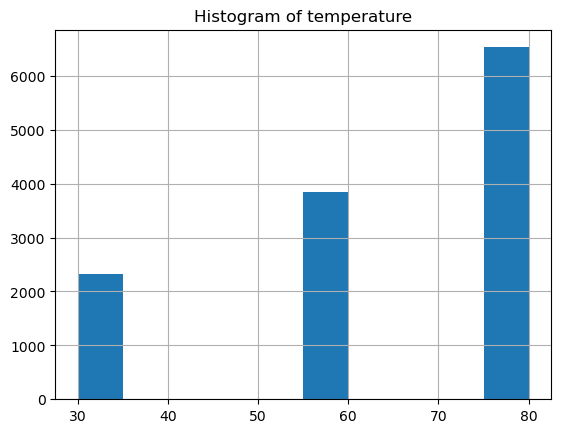

In [182]:
df.hist("temperature")
plt.title("Histogram of temperature")
plt.savefig("results/temp.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [184]:
bar = df.loc[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [186]:
len(bar.loc[bar['Y'] == 1]) / len(bar)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [188]:
bar.Bar.value_counts()

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [189]:
bar.loc[bar['Y'] == 1].Bar.value_counts()

Bar
1~3      257
less1    253
never    164
4~8      117
gt8       36
Name: count, dtype: int64

In [190]:
cond_less_than_3 = (bar['Bar'] == '1~3') | (bar['Bar'] == 'less1') | (bar['Bar'] == 'never')
cond_more_than_3 = (bar['Bar'] != '1~3') & (bar['Bar'] != 'less1') & (bar['Bar'] != 'never')
bar_Y = (bar['Y'] == 1)
accept_less_than_3 = len(bar.loc[cond_less_than_3 & bar_Y]) / len(bar)
accept_more_than_3 = len(bar.loc[cond_more_than_3 & bar_Y]) / len(bar)
print(f"Three or less has an acceptance rate of {accept_less_than_3}. More than three has an acceptance rate of {accept_more_than_3}")

Three or less has an acceptance rate of 0.3341596430342092. More than three has an acceptance rate of 0.07585523054040655


Drivers that go to bar three times a week, would have higher rate of accepting the coupons.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [193]:
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12684 non-null

In [195]:
bar_1 = df.loc[(df['Bar'] != 'never') & (df['Bar'] != 'less1')].loc[(df['age'] != '21') & (df['age'] != 'below21')]
acceptance_rate_bar_1 = len(bar_1.loc[bar_1['Y'] == 1]) / len(bar_1)
acceptance_rate_all_else = len(df.loc[df['Y'] == 1]) / len(df)
print(f"The acceptance rate of drivers that go to a bar at least 3 times per week and are over the age of 25 is {acceptance_rate_bar_1}. The acceptance rate of everyone else is {acceptance_rate_all_else}.")

The acceptance rate of drivers that go to a bar at least 3 times per week and are over the age of 25 is 0.6215340295282679. The acceptance rate of everyone else is 0.5684326710816777.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [197]:
df['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [198]:
df['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [199]:
bar_more_1_month = df.loc[(df['Bar'] != 'never') & (df['Bar'] != 'less1')]
no_kid = bar_more_1_month.loc[bar_more_1_month['passanger'] != 'Kid(s)']
not_farming = df.loc[df['occupation'] != 'Farming Fishing & Forestry']
accept_1 = len(no_kid.loc[no_kid['Y'] == 1]) / len(no_kid)
accept_2 = len(not_farming.loc[not_farming['Y'] == 1]) / len(not_farming)
print(f"The acceptance rate of drivers that go to the bar at least once per month and don't have kids is {accept_1}. And the acceptance rate of drivers that have an occupation other than Farming Fishing & Forestry is {accept_2}.")

The acceptance rate of drivers that go to the bar at least once per month and don't have kids is 0.6231060606060606. And the acceptance rate of drivers that have an occupation other than Farming Fishing & Forestry is 0.5685467921841626.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12684 non-null

In [202]:
df.maritalStatus.value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [203]:
df.RestaurantLessThan20.value_counts()

RestaurantLessThan20
1~3      5376
4~8      3710
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [204]:
df.income.value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [205]:
bar_more_1_month = (df['Bar'] != 'never') & (df['Bar'] != 'less1')
no_kids_in_car = (df['passanger'] != 'Kid(s)')
not_widowed = (df['maritalStatus'] != 'widowed')
under_30 = (df['age'] != '21') & (df['age'] != '26') & (df['age'] != 'below21')
cheap_4_more = (df['RestaurantLessThan20'] != '4~8') & (df['RestaurantLessThan20'] != 'gt8')
income_under_50 = (df['income'] == '$25000 - $37499') | (df['income'] == '$12500 - $24999') | (df['income'] == '$37500 - $49999') | (df['income'] == 'Less than $12500')
condition_1 = bar_more_1_month & no_kids_in_car & not_widowed
condition_2 = bar_more_1_month & under_30
condition_3 = cheap_4_more & income_under_50
Y_cond = df['Y'] == 1
result_1 = len(df[condition_1 & Y_cond]) / len(df)
result_2 = len(df[condition_2 & Y_cond]) / len(df)
result_3 = len(df[condition_3 & Y_cond]) / len(df)
print(f"The first condition yields an acceptance rate of {result_1}, the second condition yields an acceptance rate of {result_2}, the third condition yields an acceptance rate of {result_3}")

The first condition yields an acceptance rate of 0.1815673289183223, the second condition yields an acceptance rate of 0.07868180384736675, the third condition yields an acceptance rate of 0.19386628823714916


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

If they go to the bar once a month, they will more likely to accept the coupon. Drivers that have no kids and go to the bar more than once a month is more likely to accept the coupons. Drivers that have income below 50, do not accept the coupons. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [159]:
coffee_data  = data[(data['coupon']=='Coffee House') & (data['Y'])]

In [163]:
all_occupations = coffee_data['occupation'].value_counts()
print(all_occupations)

occupation
Student                                      312
Unemployed                                   309
Computer & Mathematical                      226
Sales & Related                              139
Management                                   136
Education&Training&Library                   129
Arts Design Entertainment Sports & Media     106
Office & Administrative Support               85
Business & Financial                          70
Retired                                       66
Healthcare Practitioners & Technical          55
Transportation & Material Moving              47
Healthcare Support                            40
Food Preparation & Serving Related            37
Architecture & Engineering                    35
Life Physical Social Science                  29
Community & Social Services                   26
Legal                                         26
Protective Service                            26
Personal Care & Service                       25
Installat

In [165]:
age_distribution = coffee_data['age'].value_counts()
print(age_distribution)

age
21         463
26         434
31         297
50plus     229
36         188
41         163
46         113
below21    108
Name: count, dtype: int64


In [167]:
income_levels = coffee_data['income'].value_counts()
print(income_levels)

income
$12500 - $24999     321
$37500 - $49999     320
$25000 - $37499     303
$50000 - $62499     276
$100000 or More     264
Less than $12500    170
$87500 - $99999     151
$62500 - $74999     120
$75000 - $87499      70
Name: count, dtype: int64


In [169]:
visit_frequency = coffee_data['CoffeeHouse'].value_counts()
print(visit_frequency)

CoffeeHouse
1~3      675
less1    518
4~8      369
gt8      225
never    208
Name: count, dtype: int64


In [171]:
acceptance_rate = len(coffee_data) / len(data[data['coupon'] == 'Coffee House'])
print(f"Acceptance Rate for Coffee House Coupon: {acceptance_rate:.2%}")

Acceptance Rate for Coffee House Coupon: 49.92%


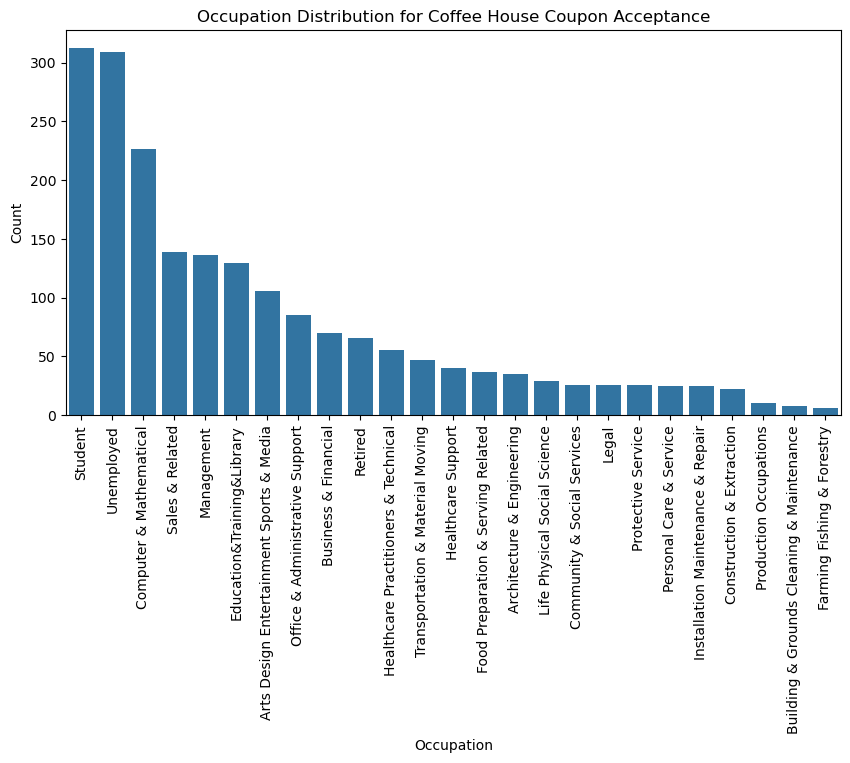

In [173]:
plt.figure(figsize=(10,5))
sns.barplot(x=all_occupations.index, y=all_occupations.values)
plt.xticks(rotation=90)
plt.title("Occupation Distribution for Coffee House Coupon Acceptance")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

Certain occupations, such as students are more likely to accept coffee house coupons compared to other professions. Drivers with middle-income levels (e.g., $25K-$75K) are more likely to accept coffee house coupons compared to lower-income or high-income groups. Drivers who already visit coffee houses regularly (e.g., 2+ times per month) are more likely to accept the coupon than those who rarely visit.